In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import v_measure_score, completeness_score

In [4]:
data = pd.read_csv("marketing_campaign.csv", delimiter="\t")

In [5]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [6]:
data.head().T

0           1           2           3  \
ID                         5524        2174        4141        6182   
Year_Birth                 1957        1954        1965        1984   
Education            Graduation  Graduation  Graduation  Graduation   
Marital_Status           Single      Single    Together    Together   
Income                  58138.0     46344.0     71613.0     26646.0   
Kidhome                       0           1           0           1   
Teenhome                      0           1           0           0   
Dt_Customer          04-09-2012  08-03-2014  21-08-2013  10-02-2014   
Recency                      58          38          26          26   
MntWines                    635          11         426          11   
MntFruits                    88           1          49           4   
MntMeatProducts             546           6         127          20   
MntFishProducts             172           2         111          10   
MntSweetProducts             88           1          21           3   
MntGoldProds                 88           6          42           5   
NumDealsPurchases             3           2           1           2   
NumWebPurchases               8           1           8           2   
NumCatalogPurchases          10           1           2           0   
NumStorePurchases             4           2          10           4   
NumWebVisitsMonth             7           5           4           6   
AcceptedCmp3                  0           0           0           0   
AcceptedCmp4                  0           0           0           0   
AcceptedCmp5                  0           0           0           0   
AcceptedCmp1                  0           0           0           0   
AcceptedCmp2                  0           0           0           0   
Complain                      0           0           0           0   
Z_CostContact                 3           3           3           3   
Z_Revenue                    11          11          11          11   
Response                      1           0           0           0   

                              4  
ID                         5324  
Year_Birth                 1981  
Education                   PhD  
Marital_Status          Married  
Income                  58293.0  
Kidhome                       1  
Teenhome                      0  
Dt_Customer          19-01-2014  
Recency                      94  
MntWines                    173  
MntFruits                    43  
MntMeatProducts             118  
MntFishProducts              46  
MntSweetProducts             27  
MntGoldProds                 15  
NumDealsPurchases             5  
NumWebPurchases               5  
NumCatalogPurchases           3  
NumStorePurchases             6  
NumWebVisitsMonth             5  
AcceptedCmp3                  0  
AcceptedCmp4                  0  
AcceptedCmp5                  0  
AcceptedCmp1                  0  
AcceptedCmp2                  0  
Complain                      0  
Z_CostContact                 3  
Z_Revenue                    11  
Response                      0

In [7]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
data.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7  08-05-2013       32        76  ...                  8             0   
8  06-06-2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

## EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
# There are 28 columns which are of similar type
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [9]:
len(data)

2240

## Data Engineering

In [10]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
# Fill the values in Income with the median value
data["Income"].fillna(data["Income"].median(), inplace=True)

In [12]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
## Drop the ID, Z_CostContact and the Z_Revenue columns
data.drop(["ID", "Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

In [14]:
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  04-09-2012       58       635         88  ...                   10   
1  08-03-2014       38        11          1  ...                    1   
2  21-08-2013       26       426         49  ...                    2   
3  10-02-2014       26        11          4  ...                    0   
4  19-01-2014       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

In [15]:
data["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [16]:
data["Education"] = data["Education"].replace(["Graduation", "PhD", "Master", "2n Cycle"], "Post-Graduate")
data["Education"] = data["Education"].replace("Basic", "Under-Graduate")

In [17]:
data["Education"].value_counts()

Education
Post-Graduate     2186
Under-Graduate      54
Name: count, dtype: int64

Unique Values in the Education columns is Education
Post-Graduate     2186
Under-Graduate      54
Name: count, dtype: int64




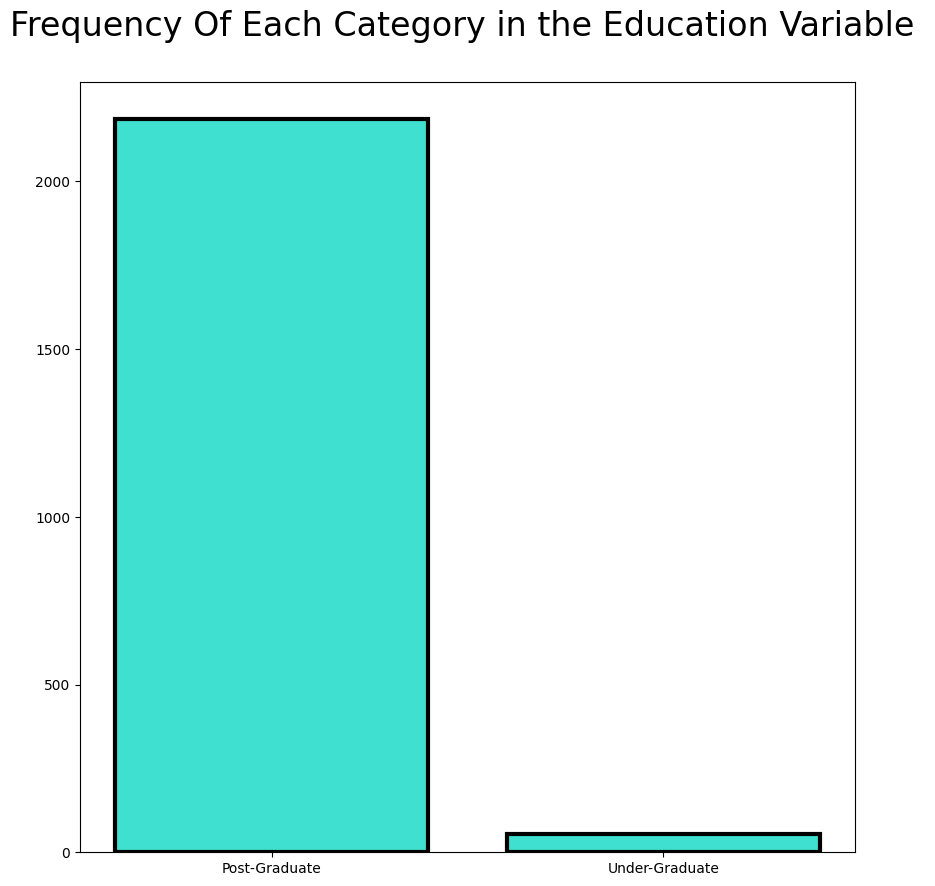

In [18]:
print(f"Unique Values in the Education columns is {data.Education.value_counts()}")
print("\n")

# Plotting the graph for the unique values
fig, ax = plt.subplots(figsize=(10, 10))
# Get the counts of unique values in the "Education" column
counts = data["Education"].value_counts()
# Create a bar plot
ax.bar(counts.index, counts.values, color="turquoise", edgecolor="black", linewidth=3)
plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=24)
fig.savefig("Documents/Customer Personality Analysis/")

In [18]:
data.head()

Year_Birth      Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Post-Graduate         Single  58138.0        0         0   
1        1954  Post-Graduate         Single  46344.0        1         1   
2        1965  Post-Graduate       Together  71613.0        0         0   
3        1984  Post-Graduate       Together  26646.0        1         0   
4        1981  Post-Graduate        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  04-09-2012       58       635         88  ...                   10   
1  08-03-2014       38        11          1  ...                    1   
2  21-08-2013       26       426         49  ...                    2   
3  10-02-2014       26        11          4  ...                    0   
4  19-01-2014       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

In [19]:
# Changing the kidhome and teenhome
data["Kids"] = data["Kidhome"] + data["Teenhome"]
data.head()

Year_Birth      Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Post-Graduate         Single  58138.0        0         0   
1        1954  Post-Graduate         Single  46344.0        1         1   
2        1965  Post-Graduate       Together  71613.0        0         0   
3        1984  Post-Graduate       Together  26646.0        1         0   
4        1981  Post-Graduate        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumStorePurchases  \
0  04-09-2012       58       635         88  ...                  4   
1  08-03-2014       38        11          1  ...                  2   
2  21-08-2013       26       426         49  ...                 10   
3  10-02-2014       26        11          4  ...                  4   
4  19-01-2014       94       173         43  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  Kids  
0             0         0         1     0  
1             0         0         0     2  
2             0         0         0     0  
3             0         0         0     1  
4             0         0         0     1  

[5 rows x 27 columns]

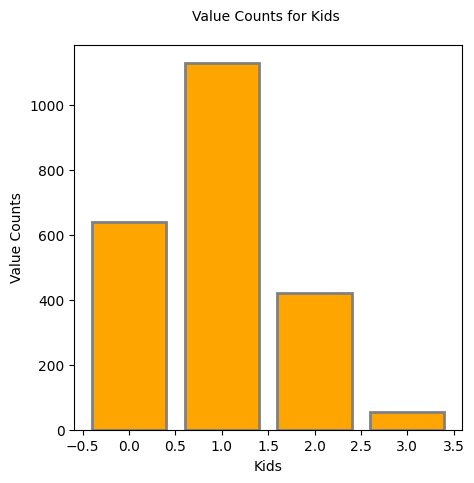

In [21]:
# Plotting the graph for the value counts of kids
fig, ax = plt.subplots(figsize=(5, 5))
counts = data.Kids.value_counts()
ax.bar(counts.index, counts.values, color="Orange", edgecolor="grey", linewidth=2)
plt.title("Value Counts for Kids \n", fontsize=10)
plt.xlabel("Kids")
plt.ylabel("Value Counts")
fig.savefig("Documents/Customer Personality Analysis/Images")

In [20]:
data["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [22]:
# Reduce the dimensonality
data["Marital_Status"] = data["Marital_Status"].replace(["Married", "Together"], "In-Relationship")
data["Marital_Status"] = data["Marital_Status"].replace(["Single", "Divorced", "Widow", "Alone", "Absurd", "YOLO"], "Single")


In [23]:
data.head()

Year_Birth      Education   Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Post-Graduate           Single  58138.0        0         0   
1        1954  Post-Graduate           Single  46344.0        1         1   
2        1965  Post-Graduate  In-Relationship  71613.0        0         0   
3        1984  Post-Graduate  In-Relationship  26646.0        1         0   
4        1981  Post-Graduate  In-Relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumStorePurchases  \
0  04-09-2012       58       635         88  ...                  4   
1  08-03-2014       38        11          1  ...                  2   
2  21-08-2013       26       426         49  ...                 10   
3  10-02-2014       26        11          4  ...                  4   
4  19-01-2014       94       173         43  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  Kids  
0             0         0         1     0  
1             0         0         0     2  
2             0         0         0     0  
3             0         0         0     1  
4             0         0         0     1  

[5 rows x 27 columns]

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
counts = data.Marital_Status.value_counts()
ax.bar(counts.index, counts.values, color="gold", edgecolor="black", linewidth=2)
plt.title("Frequency Of Each Category in the Marital_Status Variable \n",fontsize=10)
fig.savefig("Documents/Customer Personality Analysis/Images")

/tmp/ipykernel_4198/1351278601.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Income"],color = 'turquoise')


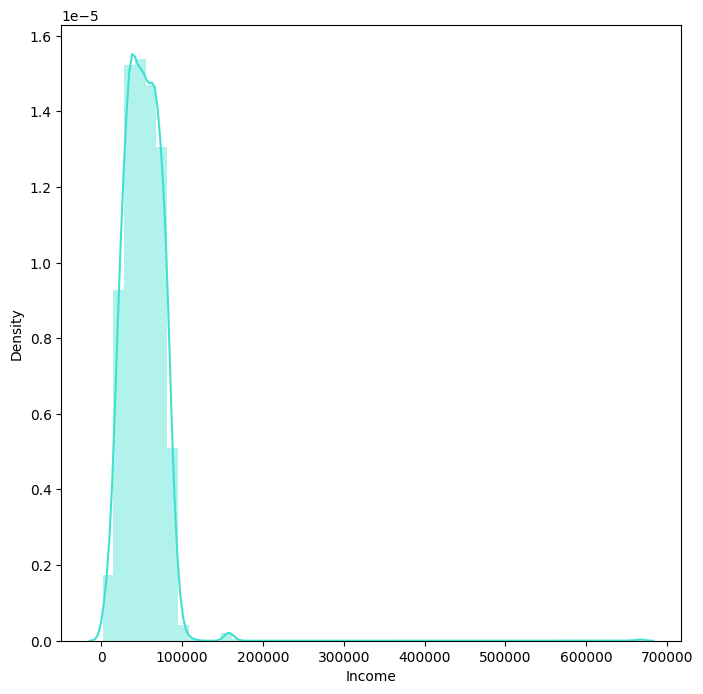

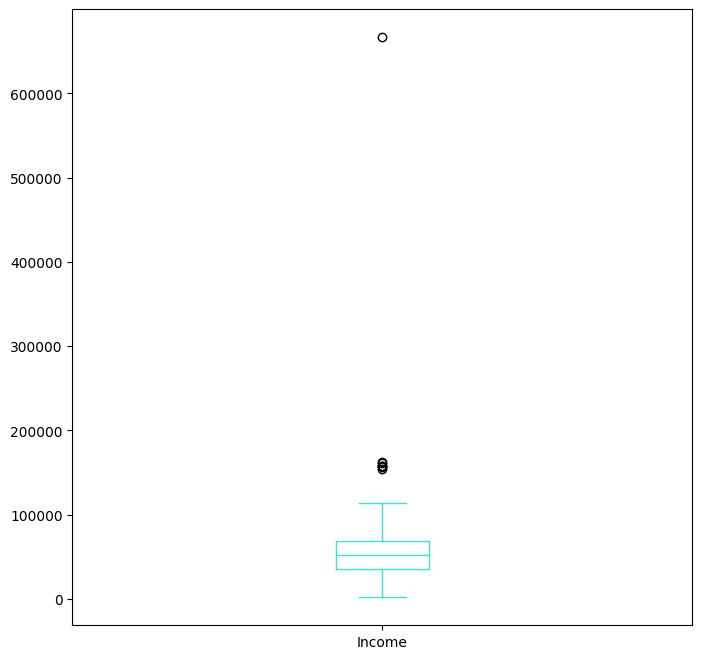

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(data["Income"],color = 'turquoise')
plt.show()
data["Income"].plot.box(figsize=(8,8),color = 'turquoise')
plt.show()
fig.savefig("Documents/Customer Personality Analysis/Images")

In [24]:
data["Expenses"] = data["MntFishProducts"] + data["MntFruits"] + data["MntGoldProds"] + data["MntMeatProducts"] + data["MntSweetProducts"] + data["MntWines"]

In [25]:
data.head()

Year_Birth      Education   Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Post-Graduate           Single  58138.0        0         0   
1        1954  Post-Graduate           Single  46344.0        1         1   
2        1965  Post-Graduate  In-Relationship  71613.0        0         0   
3        1984  Post-Graduate  In-Relationship  26646.0        1         0   
4        1981  Post-Graduate  In-Relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0  04-09-2012       58       635         88  ...                  7   
1  08-03-2014       38        11          1  ...                  5   
2  21-08-2013       26       426         49  ...                  4   
3  10-02-2014       26        11          4  ...                  6   
4  19-01-2014       94       173         43  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  Kids  Expenses  
0         0         1     0      1617  
1         0         0     2        27  
2         0         0     0       776  
3         0         0     1        53  
4         0         0     1       422  

[5 rows x 28 columns]

In [26]:
data.Expenses.value_counts()

Expenses
46      19
22      18
57      16
44      15
55      15
        ..
1345     1
764      1
368      1
292      1
843      1
Name: count, Length: 1054, dtype: int64

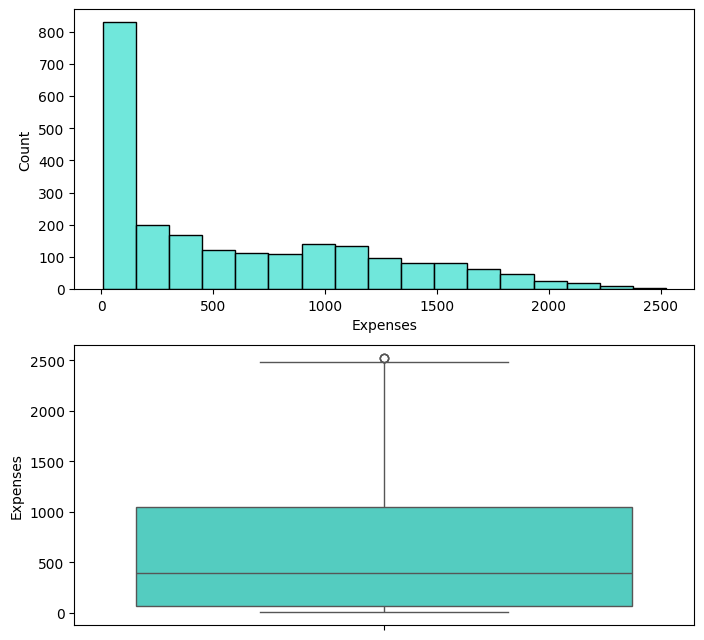

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Generate the histogram
sns.histplot(data["Expenses"], color='turquoise', ax=ax1)

# Generate the box plot
sns.boxplot(data["Expenses"], color='turquoise', ax=ax2)

# Display the figure
plt.show()

# Save the figure
fig.savefig("Documents/Customer Personality Analysis/Images/figure1.png")


In [27]:
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

In [28]:
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']
data['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44])

In [29]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data=data.drop(columns=col_del,axis=1)
data.sample(10)

Year_Birth      Education   Marital_Status   Income Dt_Customer  \
644         1947  Post-Graduate  In-Relationship  77632.0  10-03-2013   
1764        1986  Post-Graduate  In-Relationship  21955.0  07-09-2013   
2007        1964  Post-Graduate           Single  41638.0  13-02-2013   
2142        1968  Post-Graduate           Single  36997.0  01-02-2013   
1054        1983  Post-Graduate  In-Relationship  27100.0  05-04-2013   
1410        1977  Post-Graduate  In-Relationship  69389.0  28-09-2012   
1668        1970  Post-Graduate  In-Relationship  69084.0  19-11-2013   
1373        1960  Post-Graduate           Single  50611.0  04-10-2012   
326         1976  Post-Graduate           Single  14849.0  02-07-2013   
299         1965  Post-Graduate           Single  57912.0  17-03-2014   

      Recency  Complain  Response  Kids  Expenses  TotalAcceptedCmp  \
644        73         0         1     0      2252                 2   
1764       81         0         0     1        55                 0   
2007       68         0         0     1       441                 1   
2142       72         0         0     2        94                 0   
1054       64         0         0     1        37                 0   
1410       17         0         0     1       797                 0   
1668       43         0         0     1      1586                 0   
1373       98         0         0     1       493                 1   
326        39         0         0     1        65                 0   
299        34         0         0     1       916                 1   

      NumTotalPurchases  
644                  13  
1764                  8  
2007                 17  
2142                 12  
1054                  5  
1410                 22  
1668                 25  
1373                 22  
326                   9  
299                  28

In [30]:
data.drop("Dt_Customer", axis=1, inplace=True)

In [31]:
data["Age"] = pd.Timestamp('now').year - data["Year_Birth"]

In [32]:
data.head()

Year_Birth      Education   Marital_Status   Income  Recency  Complain  \
0        1957  Post-Graduate           Single  58138.0       58         0   
1        1954  Post-Graduate           Single  46344.0       38         0   
2        1965  Post-Graduate  In-Relationship  71613.0       26         0   
3        1984  Post-Graduate  In-Relationship  26646.0       26         0   
4        1981  Post-Graduate  In-Relationship  58293.0       94         0   

   Response  Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases  Age  
0         1     0      1617                 0                 25   67  
1         0     2        27                 0                  6   70  
2         0     0       776                 0                 21   59  
3         0     1        53                 0                  8   40  
4         0     1       422                 0                 19   43

In [33]:
data.drop("Year_Birth", axis=1, inplace=True)

In [34]:
data.head()

Education   Marital_Status   Income  Recency  Complain  Response  Kids  \
0  Post-Graduate           Single  58138.0       58         0         1     0   
1  Post-Graduate           Single  46344.0       38         0         0     2   
2  Post-Graduate  In-Relationship  71613.0       26         0         0     0   
3  Post-Graduate  In-Relationship  26646.0       26         0         0     1   
4  Post-Graduate  In-Relationship  58293.0       94         0         0     1   

   Expenses  TotalAcceptedCmp  NumTotalPurchases  Age  
0      1617                 0                 25   67  
1        27                 0                  6   70  
2       776                 0                 21   59  
3        53                 0                  8   40  
4       422                 0                 19   43

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Recency            2240 non-null   int64  
 4   Complain           2240 non-null   int64  
 5   Response           2240 non-null   int64  
 6   Kids               2240 non-null   int64  
 7   Expenses           2240 non-null   int64  
 8   TotalAcceptedCmp   2240 non-null   int64  
 9   NumTotalPurchases  2240 non-null   int64  
 10  Age                2240 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 192.6+ KB


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Education
Marital_Status


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = le.fit_transform(data[label])
        print(label)

Education
Marital_Status


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   int64  
 1   Marital_Status     2240 non-null   int64  
 2   Income             2240 non-null   float64
 3   Recency            2240 non-null   int64  
 4   Complain           2240 non-null   int64  
 5   Response           2240 non-null   int64  
 6   Kids               2240 non-null   int64  
 7   Expenses           2240 non-null   int64  
 8   TotalAcceptedCmp   2240 non-null   int64  
 9   NumTotalPurchases  2240 non-null   int64  
 10  Age                2240 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 192.6 KB


In [38]:
data.head()

Education  Marital_Status   Income  Recency  Complain  Response  Kids  \
0          0               1  58138.0       58         0         1     0   
1          0               1  46344.0       38         0         0     2   
2          0               0  71613.0       26         0         0     0   
3          0               0  26646.0       26         0         0     1   
4          0               0  58293.0       94         0         0     1   

   Expenses  TotalAcceptedCmp  NumTotalPurchases  Age  
0      1617                 0                 25   67  
1        27                 0                  6   70  
2       776                 0                 21   59  
3        53                 0                  8   40  
4       422                 0                 19   43

In [46]:
data["Education"].head(30)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: Education, dtype: int64

In [45]:
data.Marital_Status.head(20)

0     1
1     1
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    0
15    1
16    0
17    0
18    0
19    1
Name: Marital_Status, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(data.values)
scaled_data = pd.DataFrame(scaled_feat, data.index, columns=data.columns)

In [40]:
data.values.shape

(2240, 11)

In [41]:
scaled_data.head()

Education  Marital_Status    Income   Recency  Complain  Response  \
0  -0.157171        1.346874  0.235696  0.307039 -0.097282  2.388846   
1  -0.157171        1.346874 -0.235454 -0.383664 -0.097282 -0.418612   
2  -0.157171       -0.742460  0.773999 -0.798086 -0.097282 -0.418612   
3  -0.157171       -0.742460 -1.022355 -0.798086 -0.097282 -0.418612   
4  -0.157171       -0.742460  0.241888  1.550305 -0.097282 -0.418612   

       Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases       Age  
0 -1.264505  1.679417         -0.439037           1.320826  0.985345  
1  1.396361 -0.961275         -0.439037          -1.154596  1.235733  
2 -1.264505  0.282673         -0.439037           0.799685  0.317643  
3  0.065928 -0.918094         -0.439037          -0.894025 -1.268149  
4  0.065928 -0.305254         -0.439037           0.539114 -1.017761

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)
y_pred = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [70]:
def evaluation(y_true, y_pred):
    metrics = {"V Score": v_measure_score(y_true, y_pred),
               "Completeness Score": completeness_score(y_true, y_pred)
              }
    return metrics

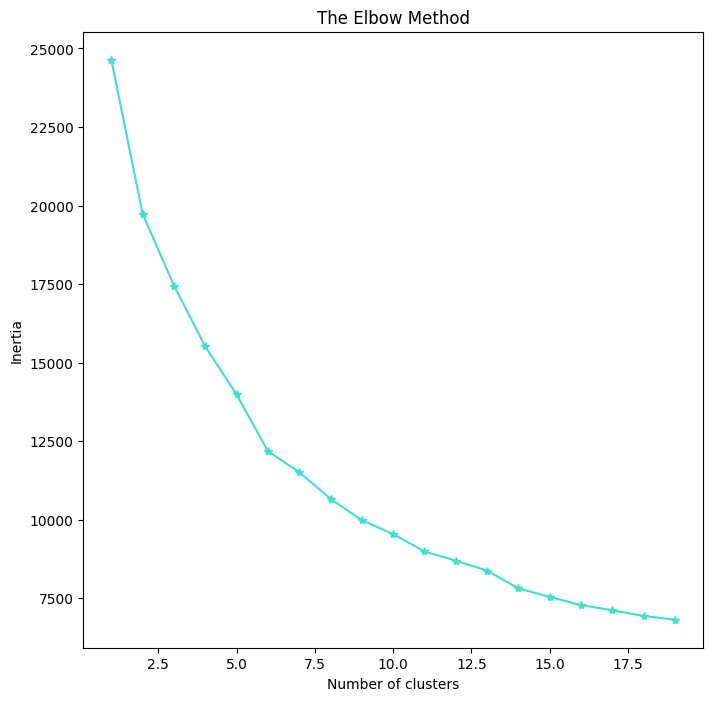

In [59]:
# Your previous plotting code
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(range(1, 20), inertia, color = "turquoise", marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Display the figure
plt.show()

# Save the figure
fig.savefig("Documents/Customer Personality Analysis/Images/figure.png")


In [43]:
from sklearn.cluster import MeanShift
meanshift = MeanShift()
meanshift.fit(scaled_data)

MeanShift()

In [46]:
y_pred = meanshift.predict(scaled_data)

In [48]:
len(y_pred)

2240

In [78]:
evaluation(scaled_data["Income"], y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


{'V Score': 0.26926006181330686, 'Completeness Score': 0.9771497824926237}

In [80]:
from sklearn.metrics import silhouette_score

# Assuming X is your data and meanshift is your trained MeanShift model
silhouette = silhouette_score(scaled_data, meanshift.labels_)
print("Silhouette Score: ", silhouette)

Silhouette Score:  0.30090876725773685


In [64]:
silhouette_kmeans = silhouette_score(scaled_data, kmeans.labels_)
print("Silhouette Score: ", silhouette_kmeans)

Silhouette Score:  0.18263584152258325


In [77]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
y_pred_a = model.fit_predict(scaled_data)
evaluation(scaled_data["Income"], y_pred_a)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  FutureWarning,
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


{'V Score': 0.23728610406534217, 'Completeness Score': 0.9691639402456032}

In [81]:
silhouette_agg = silhouette_score(scaled_data, model.labels_)
print("Silhouette Score: ", silhouette_agg)


Silhouette Score:  0.1911643244526786


In [76]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
y_pred_d = dbscan.fit_predict(scaled_data)
evaluation(scaled_data["Income"], y_pred_d)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


{'V Score': 0.2135729250276125, 'Completeness Score': 0.98163185474055}

In [69]:
silhouette_dbs = silhouette_score(scaled_data, dbscan.labels_)
print("Silhouette Score: ", silhouette_dbs)

Silhouette Score:  -0.3387507259062093


In [71]:
evaluation(scaled_data["Income"], y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


{'V Score': 0.26926006181330686, 'Completeness Score': 0.9771497824926237}